# **Projet Python 2A: D’où viennent nos athlètes ?**

Jules Chapon, Antoine Claisse, Côme Raj

**Partie 1 : Récupération des données et premières manipulations**

On commence par importer notre base de données principale, celle contenant les différents équipements sportifs en France.
Nous en obtenons un rapide aperçu ci-dessous.
Nous appellerons cette base de données *equipements*.

In [53]:
import pandas as pd

equipements = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/equipments.csv", sep=';', encoding='latin-1', low_memory=False)
equipements.head()


,DepCode,DepLib,ComInsee,ComLib,InsNumeroInstall,InsNom,EquipementId,EquNom,EquipementTypeCode,EquipementTypeLib,...,EquUtilClub,EquUtilAutre,EquUtilIndividuel,EquUtilPerformance,EquUtilFormation,EquUtilRecreation,EquDateDernierTravauxReal,EquDateDernierTravauxAucun,EquGPSX,EquGPSY
0,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E001I010010003,SALLE POLYVALENTE,2201,Salles polyvalentes / des fêtes / non spéciali...,...,1,1,1,0,0,1,NaN,1.0,"4,9206","46,1531"
1,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E002I010010003,BOULODROME COUVERT 8 JEUX,201,Terrain de boules,...,1,0,0,0,0,1,NaN,1.0,"4,9206","46,1531"
2,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E003I010010003,BOULODROME EXTERIEUR,201,Terrain de boules,...,1,0,1,0,0,1,NaN,1.0,"4,9206","46,1531"
3,01,Ain,01001,Abergement-Clémenciat,I010010004,Espace Multi-Activites,E001I010010004,Terrain de Foot de Proximité,2802,Terrain de football,...,0,0,1,0,0,1,NaN,1.0,"4,9247","46,1511"
4,01,Ain,01001,Abergement-Clémenciat,I010010004,Espace Multi-Activites,E002I010010004,AGORESPACE,1701,Plateau EPS/Multisports/city-stades,...,0,0,1,0,0,1,NaN,1.0,"4,9242","46,1508"


Commençons par réaliser quelques statistiques descriptives, afin de vérifier si la base de données est cohérente et exhaustive.

In [54]:
equipements.count()

DepCode                            318037
DepLib                             318037
ComInsee                           318037
ComLib                             318037
InsNumeroInstall                   318037
InsNom                             315472
EquipementId                       318037
EquNom                             318037
EquipementTypeCode                 318037
EquipementTypeLib                  318037
EquipementFamille                  318037
EquipementCateg                    318037
GestionTypeProprietairePrincLib    314826
GestionTypeGestionnairePrincLib    313934
GestionTypeProprietaireSecLib       53021
GestionTypeGestionnaireSecLib       26242
EquAnneeService                    202275
NatureSolLib                       313302
NatureLibelle                      314948
EquUtilScolaire                    318037
EquUtilClub                        318037
EquUtilAutre                       318037
EquUtilIndividuel                  318037
EquUtilPerformance                

In [55]:
equipements.nunique()

DepCode                               107
DepLib                                107
ComInsee                            28458
ComLib                              26784
InsNumeroInstall                   139953
InsNom                              78767
EquipementId                       318037
EquNom                             114650
EquipementTypeCode                    163
EquipementTypeLib                     163
EquipementFamille                      30
EquipementCateg                         7
GestionTypeProprietairePrincLib        12
GestionTypeGestionnairePrincLib        12
GestionTypeProprietaireSecLib          12
GestionTypeGestionnaireSecLib          12
EquAnneeService                       203
NatureSolLib                           16
NatureLibelle                           7
EquUtilScolaire                         2
EquUtilClub                             2
EquUtilAutre                            2
EquUtilIndividuel                       2
EquUtilPerformance                

Désormais, nous allons modifier cette base de données afin de regrouper le nombre d'équipements sportifs par département. Pour cela, nous créons un nouveau DataFrame que nous appellerons *equipements_departements*. Nous enlevons aussi la plupart des colonnes qui ne nous servent, dans un premier temps, à rien.
Afin de faciliter nos futurs graphiques, nous nous intéressons ici seulement au départements de France métropolitaine.

In [56]:
equipements_departements = pd.DataFrame(equipements.groupby('DepCode')['EquipementId'].count()).head(96)
equipements_departements = equipements_departements.rename({"EquipementId":"NbreEquipements"}, axis=1)
equipements_departements.head()

,NbreEquipements
DepCode,
01,3781
02,3442
03,2514
04,1649
05,3075


Nous pouvons désormais nous intéresser davantage aux statistiques descriptives du DataFrame *equipements_departements*.

In [57]:
equipements_departements.describe()

,NbreEquipements
count,96.000000
mean,3223.666667
std,1553.506259
min,512.000000
25%,2036.000000
50%,2918.500000
75%,3939.500000
max,8534.000000


Ainsi, on peut voir que la répartition des équipements sportifs en France est relativement hétérogène, même si une  majorité des départements semblent se situer entre 2000 et 4000 équipements sportifs.
Néanmoins, cela paraît clairement logique, au vu des situations très différentes entre les départements, que ce soit au niveau de leur population ou de l'espace disponible.

Dès lors, nous décidons dans un premier temps d'ajouter une variable explicative à la répartition des équipements sportifs en France : la population par département.
Pour cela, nous importons une nouvelle base de données, disponible cette fois sur le site de l'INSEE.
Nous pouvons obtenir un aperçu de la base de donnée susmentionnée, que nous nommons *population*.

In [58]:
population = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/Population2019.CSV", sep=';', low_memory=False)
population.head()

,CODGEO,P19_POP,P13_POP,P08_POP,D99_POP,D90_POP,D82_POP,D75_POP,D68_POP,SUPERF,...,D75_LOGVAC,D68_LOGVAC,P19_PMEN,P13_PMEN,P08_PMEN,D99_PMEN,D90_NPER_RP,D82_NPER_RP,D75_NPER_RP,D68_NPER_RP
0,01001,779,767,791,728,579,477,368,347,15.95,...,22.0,25.0,779.000000,767.000000,791.000000,728,579,477.0,368.0,347.0
1,01002,256,236,194,168,159,136,106,88,9.15,...,23.0,1.0,256.000000,236.000000,194.000000,168,159,136.0,106.0,88.0
2,01004,14134,14359,12792,11436,10455,9737,9550,8949,24.60,...,246.0,155.0,13625.012669,13831.019385,12305.616156,11015,10092,9333.0,9164.0,8582.0
3,01005,1751,1635,1567,1408,1156,848,756,627,15.92,...,16.0,15.0,1751.000000,1635.000000,1567.000000,1406,1155,848.0,753.0,627.0
4,01006,112,108,123,86,76,65,82,108,5.88,...,13.0,8.0,112.000000,108.000000,123.000000,86,76,65.0,82.0,108.0


Là encore, nous décidons de retravailler notre base de données. Pour cela, nous nous séparons des colonnes inutiles pour ne garder que la population par ville en 2019, puis nous les regroupons par département.
Nous obtenons ainsi le DataFrame *population_departements* dont un aperçu est disponible juste en-dessous.

In [59]:
population['DepCode'] = population['CODGEO'].str[:2]

population_departements = pd.DataFrame(population.groupby('DepCode')['P19_POP'].sum()).head(96)
population_departements = population_departements.rename({"P19_POP":"Population"}, axis=1)
population_departements.head()                                                        


,Population
DepCode,
01,652432
02,531345
03,335975
04,164308
05,141220


Ici encore, nous pouvons réaliser quelques statistiques descriptives rapides.

In [60]:
population_departements.describe()

,Population
count,9.600000e+01
mean,7.151655e+05
std,6.603543e+05
min,7.660400e+04
25%,2.967150e+05
50%,5.390490e+05
75%,8.508368e+05
max,4.330846e+06


Comme c'était le cas pour les équipements sportifs, la répartition de la population est également très hétérogène entre les départements.

Nous souhaitons désormais nous intéresser au lien qui existe (peut-être) entre population et nombre d'équipements sportifs au sein des départements français.

Pour cela, nous commençons par concaténer nos DataFrames en un seul, que nous nommons *data_base*.

In [61]:
data_base = pd.concat([equipements_departements,population_departements], axis=1)
data_base.head()

,NbreEquipements,Population
DepCode,,
01,3781,652432
02,3442,531345
03,2514,335975
04,1649,164308
05,3075,141220


In [62]:
data_base["NbreHabitants/Equipement"] = data_base["Population"]/data_base["NbreEquipements"]
data_base.describe()
data_base.sort_values("NbreHabitants/Equipement")

,NbreEquipements,Population,NbreHabitants/Equipement
DepCode,,,
05,3075,141220,45.925203
48,1290,76604,59.382946
36,2426,219316,90.402308
15,1581,144692,91.519292
09,1580,153287,97.017089
...,...,...,...
92,3457,1624357,469.874747
94,2781,1407124,505.977706
13,5611,2913841,519.308679


In [63]:
# packages utiles
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


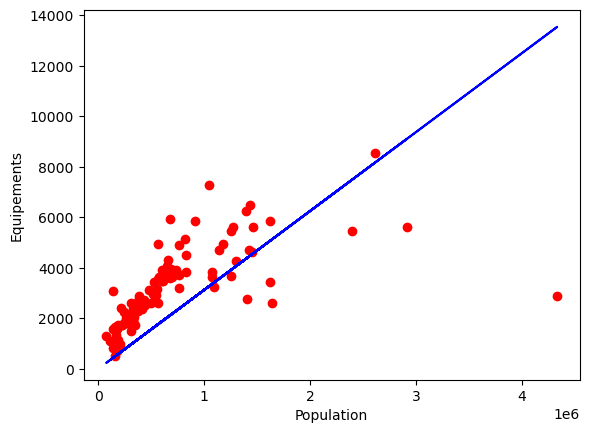

In [64]:
x = data_base[["Population"]]
y = data_base[["NbreEquipements"]]
model = LinearRegression(fit_intercept=False).fit(x,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.xlabel('Population')
plt.ylabel('Equipements')
plt.show()

In [65]:
import urllib
import bs4
import pandas as pd
from urllib import request
!pip install html5lib
!pip install lxml

In [66]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/Superficie_des_d%C3%A9partements_fran%C3%A7ais"
    
request_text = request.urlopen(url_ligue_1).read()
# print(request_text[:1000])    

In [ ]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "html.parser") # Solution trouvée sur cette page "https://stackoverflow.com/questions/24398302/bs4-featurenotfound-couldnt-find-a-tree-builder-with-the-features-you-requeste"

print(page)

In [ ]:
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_superficie = page.find('table', {'class' : 'wikitable sortable'})
print(tableau_superficie)

In [69]:
table_body = tableau_superficie.find('tbody')
rows = table_body.find_all('tr')

In [ ]:
print(rows[1])

In [ ]:
print(rows[5])

In [72]:
cols = rows[5].find_all('td')
print(cols[0])
print(cols[0].text.strip())

<td rowspan="4">01</td>
01


In [73]:
for ele in cols : 
    print(ele.text.strip())

01
Ain
Belley
1 311,66
5825,6
BelleyBourg-en-BresseGexNantua
5 762[Insee 1]
5 785,2[Brgm 1]



In [ ]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    print(cols)

In [ ]:
dico_superficie = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_superficie[cols[0]] = cols[1:]
dico_superficie

In [76]:
data_superficie = pd.DataFrame.from_dict(dico_superficie,orient='index')
data_superficie.head()


,0,1,2,3,4,5,6,7
Total France métropolitaine,,,"551 695,42",,543 940,"550 232,88",,None
01,Ain,Belley,"1 311,66","5825,6",BelleyBourg-en-BresseGexNantua,5 762[Insee 1],"5 785,2[Brgm 1]",
Bourg-en-Bresse,"3 173,75",None,None,None,None,None,None,None
Gex,"412,58",None,None,None,None,None,None,None
Nantua,"927,61",None,None,None,None,None,None,None


In [77]:
columns_departements = ['Département','Arrondissement_1950','Superf_1950','Superficie_1950','Arrondissement_2018','Superficie_INSEE','Superfcice_IGN','Localisation']
data_superficie.columns = columns_departements
data_superficie.head()

,Département,Arrondissement_1950,Superf_1950,Superficie_1950,Arrondissement_2018,Superficie_INSEE,Superfcice_IGN,Localisation
Total France métropolitaine,,,"551 695,42",,543 940,"550 232,88",,None
01,Ain,Belley,"1 311,66","5825,6",BelleyBourg-en-BresseGexNantua,5 762[Insee 1],"5 785,2[Brgm 1]",
Bourg-en-Bresse,"3 173,75",None,None,None,None,None,None,None
Gex,"412,58",None,None,None,None,None,None,None
Nantua,"927,61",None,None,None,None,None,None,None


In [86]:
data_base = pd.concat([data_base,data_superficie], join='inner', axis=1)
data_base.head()

,NbreEquipements,Population,NbreHabitants/Equipement,Département,Arrondissement_1950,Superf_1950,Superficie_1950,Arrondissement_2018,Superficie_INSEE,Superfcice_IGN,...,Superfcice_IGN,Localisation,Département,Arrondissement_1950,Superf_1950,Superficie_1950,Arrondissement_2018,Superficie_INSEE,Superfcice_IGN,Localisation
01,3781,652432,172.555409,Ain,Belley,"1 311,66","5825,6",BelleyBourg-en-BresseGexNantua,5 762,"5 785,2[Brgm 1]",...,"5 785,2[Brgm 1]",,Ain,Belley,"1 311,66","5825,6",BelleyBourg-en-BresseGexNantua,5 762[Insee 1],"5 785,2[Brgm 1]",
02,3442,531345,154.371005,Aisne,Château-Thierry,"1 201,15","7428,35",Château-ThierryLaonSaint-QuentinSoissonsVervins,7 362,7 437[Brgm 2],...,7 437[Brgm 2],,Aisne,Château-Thierry,"1 201,15","7428,35",Château-ThierryLaonSaint-QuentinSoissonsVervins,7 362[Insee 2],7 437[Brgm 2],
03,2514,335975,133.641607,Allier,Montluçon,"2 340,98","7381,83",MontluçonMoulinsVichy,7 340,7 378[Brgm 3],...,7 378[Brgm 3],,Allier,Montluçon,"2 340,98","7381,83",MontluçonMoulinsVichy,7 340[Insee 3],7 378[Brgm 3],
04,1649,164308,99.640995,Alpes-de-Haute-Provence,Barcelonnette,"1 151,18","6988,4",BarcelonnetteCastellaneDigne-les-BainsForcalquier,6 925,7 009[Brgm 4],...,7 009[Brgm 4],,Alpes-de-Haute-Provence,Barcelonnette,"1 151,18","6988,4",BarcelonnetteCastellaneDigne-les-BainsForcalquier,6 925[Insee 4],7 009[Brgm 4],
05,3075,141220,45.925203,Hautes-Alpes,Briançon,"2 194,55","5660,14",BriançonGap,5 549,5 697[Brgm 5],...,5 697[Brgm 5],,Hautes-Alpes,Briançon,"2 194,55","5660,14",BriançonGap,5 549[Insee 5],5 697[Brgm 5],


In [88]:
data_base['Superficie_INSEE']=data_base['Superficie_INSEE'].apply(lambda x: x.split(sep="[")[0])
data_base.astype({'Superficie_INSEE':np.float64})
data_base.head()

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
import plotly
import plotly.express as px
from IPython.display import HTML #pour afficher les graphs

In [ ]:
import pandas as pd

equipements = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/equipments.csv", sep=';', encoding='latin-1', low_memory=False)
equipements.head()

In [ ]:
## Graphique 1 : Les 10 sports 
df1 = equipements.groupby('EquipementTypeLib')['DepCode'].count()
df1=df1.reset_index()
df1=df1.rename(columns={'EquipementTypeLib':'Type','DepCode':'Nombre'})
df1.sort_values('Nombre', ascending=False).head(10)

In [ ]:
# 1. Diagramme en bâtons
fig = px.bar(df1.sort_values('Nombre', ascending=False).head(10).sort_values('Nombre', ascending=True), orientation='h', x='Nombre',
             y='Type', color_discrete_sequence=["red"], template="plotly_white")

fig.update_layout(
    title='Représentation de la répartition du nombre d’infrastructures sportives en fonction de la catégorie sportive',
    xaxis_title='Comptage des différents centres sportifs par type de sport')
fig.update_xaxes(title_font=dict(color='red'))

Introduction:
La France compte plus de 320 000 équipements sportifs de proximité (gymnase, bassins aquatiques, terrains de sport, city stades…) soit en moyenne 47 équipements pour 10 000 habitants (hors sports de nature et pistes cyclables) selon une étude de 2020 menée par l’Union Sport & Cycle. Dans un contexte de multiplication des infrastructures sportives en vue de la construction d’infrastructures adaptées aux exigences des disciplines sportives (surtout à haut niveau), les attentes d’une modernisation des équipements sportifs dans les communes sont toujours plus fortes (65% des pratiquants expriment le souhait d’avoir davantage d’équipements sportifs, selon la même étude citée précédemment). A travers ce projet Python, nous allons donc tenter d’identifier des caractéristiques corrélatives reliant infrastructures sportives et pratique sportive de haut niveau.
Il s’agit dès lors de répondre à la problématique suivante: dans quelle mesure la répartition des infrastructures sportives sur le territoire français impacte-t-elle la pratique du sport de haut niveau à l’échelle départementale ?
Dans un  souci de clarté et de respect des consignes, nous avons fait le choix de décliner notre réflexion en trois parties organisées de la façon suivante: dans un premier temps, l’approche consistera à sélectionner et à nettoyer les données pour être en mesure par la suite de construire des statistiques descriptives sur la répartition des équipements sportives par ville. Dans un second temps, le but sera de mesurer les déséquilibres territoriaux de la répartition des infrastructures sportives grâce à des supports cartographiques permettant une data visualisation. Enfin, nous avons décidé de clôturer notre projet sur une touche plus personnelle dans une troisième partie qui combine modélisation et analyse descriptive sur les possibles performances des athlètes lors des Jeux Olympiques de Paris en 2024.











I) Sélection et nettoyage des données / Statistiques descriptives
Dans cette première partie, l’accent est mis sur la sélection ainsi que le nettoyage des données. Ainsi, le but est ici d’exploiter et d’organiser les différentes données récoltées sur DataGouv, la plateforme officielle de diffusion de données publiques de l'État français. Par ailleurs, l’ajout de statistiques descriptives permet de vérifier la pertinence ainsi que l’exhaustivité des données qui vont être utilisées pour la suite du projet.
Première approche : stat descriptives sur le nombre d’infrastructures + sur les athlètes (moyenne, min, max)
Recherche de l’échelle adéquate
II) Déséquilibres territoriaux de la répartition des infrastructures sportives
Dans cette seconde partie, l’accent est mis sur la visualisation des données à l’échelle nationale, permettant ainsi de montrer concrètement la façon dont les infrastructures sportives sont réparties en France. Cela permet ainsi de représenter les éventuels déséquilibres territoriaux de cette répartition contribuant ainsi à expliquer l’impact potentiel de la pratique du sport à haut niveau selon les départements.
Data visualisation : carte de la France avec la répartition des différents centres/complexes sportifs à l’échelle départementale (geopanda)
Construction d’un diagramme en bâtons: répartition du type d’infrastructures sportives (colonne "Equipement TypeLib") en fonction de leur nombre pour avoir une idée de l’importance donnée par les collectivités pour chaque sport, reflétant ainsi la demande française en matière de sport
Représentation sur la carte des athlètes selon leur niveau (élite, espoir, senior…) pour chaque sport et par département (diagramme) puis comparer avec les données de géolocalisation de la carte
But de la partie: trouver une corrélation entre espoirs français/sport et répartition des infrastructures
III) Modélisation & Prédictions à l’horizon 2024
Dans cette troisième et dernière partie, l’accent est mis sur la modélisation et la prédiction de de performances sportives en vue des Jeux Olympiques de 2024 à Paris. A l’aide de la méthode dite de "Web Scraping", la finalité recherchée est ici de trouver une éventuelle corrélation entre l’investissement dans de nouvelles infrastructures sportives et les résultats des athlètes français aux derniers JO du XXIème siècle pour pronostiquer les possibles performances de certains athlètes français aux prochains Jeux Olympiques.

Lien Web Scraping: France aux Jeux olympiques — Wikipédia (wikipedia.org)
BUT: Trouver une éventuelle corrélation (i.e. régression linéaire) entre l’investissement dans de nouvelles infrastructures sportives et les résultats des athlètes français aux derniers JO du XXIème siècle (prendre en compte la date de création des infrastructures (CF. doc Excel pour variable « EquAnneeService »)



Conclusion:
Tout au long de ce projet, nous avons eu recours à divers méthodes (sélection et nettoyage des données, data visualisation, web scraping, modélisations et analyses prédictives par régression linéaire) pour être en mesure de répondre à la problématique initialement posée, à savoir si la répartition des infrastructures sportives sur le territoire français a un quelconque impact sur la pratique du sport de haut niveau à l’échelle départementale. Il semblerait que l’on puisse désormais raisonnablement répondre que cela soit le cas, en évitant toutefois de rentrer dans des considérations approximatives dans la mesure où nous nous avons fait le choix de nous attarder sur certaines variables plutôt que d’autres, et qu’il y a par conséquent un biais qui apparaît de facto.
La dernière partie permet de rajouter à notre projet une touche d’originalité et montre que notre projet s’inscrit dans l’actualité sportive en vue des prochains Jeux Olympiques. En effet, selon une étude de 2020 menée par l’Union Sport & Cycle, le développement des nouveaux équipements sportifs de proximité fait l’objet d’un soutien de l’Etat à hauteur de 10 millions d’euros annoncé en 2017. Dans le cadre de la candidature de Paris aux Jeux Olympiques et Paralympiques 2024, ces 10 millions d’euros serviront à financer, au côté des collectivités, de nouvelles infrastructures sportives de proximité. Ces participations de financement étatique semblent avoir fait leurs preuves sur le long terme; il reste désormais à savoir si ce nouvel investissement de la part du gouvernement se concrétisera par des résultats sportifs à la hauteur des attentes en 2024.
Alors pour savoir si nos prédictions sont justes, nous vous donnons rendez-vous en 2024!


In [ ]:
licences = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/Licences.csv", sep=';', encoding='latin-1', low_memory=False)
licences.head()

In [ ]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install geoplot

In [ ]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import folium
import numpy as np
import math

In [ ]:
# D'abord, trouver le centre de la carte par la moyenne. Ici, nous enlevons les départements d'outre-mer.
eq_tests = equipements.copy()
eq_tests['NumDepCode'] = np.where((eq_tests['DepCode'].isin(['2A','2B'])) , 20, eq_tests['DepCode'])

eq_tests['NumDepCode'] = pd.to_numeric(eq_tests['NumDepCode'])
eq_tests[eq_tests['NumDepCode'] <= 95].count()

In [ ]:
## Ici, je convertis les colonnes longitudes et lattitudes qui sont des strings en numerics 
eq_metro = eq_tests[eq_tests['NumDepCode'] <= 95]
center = pd.DataFrame({'lat' : eq_metro['EquGPSY'],'lon' : eq_metro['EquGPSX']})
center['lat'] = pd.to_numeric(center['lat'].str.replace(",", "."))
center['lon'] = pd.to_numeric(center['lon'].str.replace(",", "."))
center[center['lat'] > 51] #petit imprévu : les coordonées sont sensées être entrées en WGS84 mais des fautes de frappes/erreurs de format se sont glissées comme ici la ligne 16582 qui est omet les degrés (43, 6) et ne précise que les minutes d'arcs

In [ ]:
#Ici nous supprimons les lignes "défectueuses" (points extrêmes :51° 05′ 21″ N,41° 19′ N, 5° 09′ 04″ O, 9° 33′ 36″ E)

mapable = center.loc[(center['lat'] < 52 ) & (center['lat'] > 41) & (center['lon'] > -5.15) & (center['lon'] < 9.55)]
eqnoms = mapable.join(eq_metro['EquNom'])

In [ ]:
map_center = mapable.mean(0).values.tolist()
map_center

#The result isn't this far from the center computed by the IGN in 1993 which sets the center at 46° 32′ 23″ N, 2° 25′ 49″ E.

In [ ]:
ne = mapable.min().values.tolist()
so = mapable.max().values.tolist()

print(ne, so)

In [ ]:
# 2. Carte interactive
from pathlib import Path
Path("leaflet").mkdir(parents=True, exist_ok=True)
m = folium.Map(location = map_center, tiles='Stamen Toner')

# Ajout des markers 1 à 1 sur la carte
indices_list = mapable.sample(300).index.tolist() #Je n'en affiche que 300 pour des raisons de lisibilité
for i in indices_list:
    folium.Marker([mapable.loc[i]['lat'], mapable.loc[i]['lon']], popup=eqnoms.loc[i]['EquNom']).add_to(m)
m.fit_bounds([so, ne])
m